In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import norm
import seaborn as sns

In [2]:
# Generate 1000 samples using Box-Muller Transform
u1 = np.random.rand(1000)
u2 = np.random.rand(1000)
Z0 = np.sqrt(-2 * np.log(u1)) * np.cos(2 * np.pi * u2)
Z1 = np.sqrt(-2 * np.log(u1)) * np.sin(2 * np.pi * u2)

In [4]:
print(len(Z1))

1000


In [5]:
normal_samples = np.concatenate((Z0, Z1))
print(len(normal_samples))

2000


In [7]:
data = np.random.normal(np.mean(normal_samples), np.std(normal_samples), 1000)
print(data)

[ 1.03485024e+00 -4.41594943e-01 -8.47581713e-01 -4.50567982e-01
  3.22269161e-04  9.91037005e-01  3.68068791e-01  1.26106543e+00
 -6.20295070e-01 -5.06837493e-01  8.66746712e-01  4.35095098e-01
 -1.55791302e+00 -7.36642282e-01  1.32109793e+00 -6.61505897e-01
 -2.23339574e-01 -1.19104523e+00  1.95297462e-01  1.67645761e-01
 -8.27957513e-01  3.70112798e-02 -3.20796101e-01 -1.31169309e+00
  4.55510755e-01  1.55712448e+00  7.14243737e-01 -2.56210041e-01
  1.21856434e-01  1.72919459e-01  2.80869079e+00 -8.75900222e-01
 -1.16543781e-01 -1.81460744e-01  9.36109173e-01 -6.40174237e-01
  2.63880377e-01  3.56268720e-01  1.54317889e+00  1.32109070e+00
 -2.84076420e-01 -4.01417181e-01  8.52181578e-01  1.80673047e-01
 -1.61032404e-01 -1.29964197e+00  1.64317495e-01  1.12882965e+00
  3.19751677e+00 -8.70269707e-01 -1.29189793e-01 -1.88771838e-01
  3.11350948e-02 -9.33679001e-01 -1.25402507e+00  4.17506112e-01
 -1.94239114e-01 -1.64436438e+00  1.07298169e+00 -1.07758792e-01
  7.16172811e-01 -7.19104

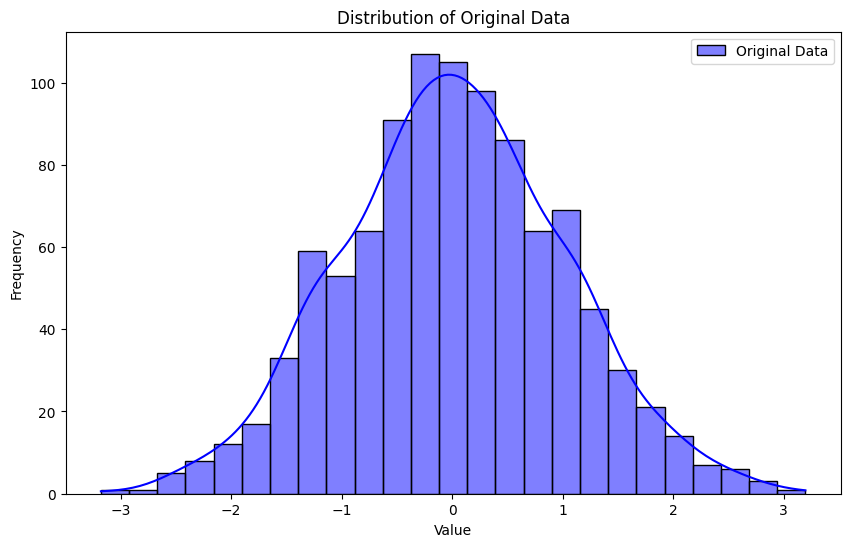

In [8]:
# Bootstrap the data into 10 samples
bootstrap_samples = [np.random.choice(data, size=1000, replace=True) for _ in range(10)]

# Plot the distribution of the original data
plt.figure(figsize=(10, 6))
sns.histplot(data, kde=True, color='blue', label='Original Data')
plt.legend()
plt.title('Distribution of Original Data')
plt.xlabel('Value')
plt.ylabel('Frequency')
plt.show()

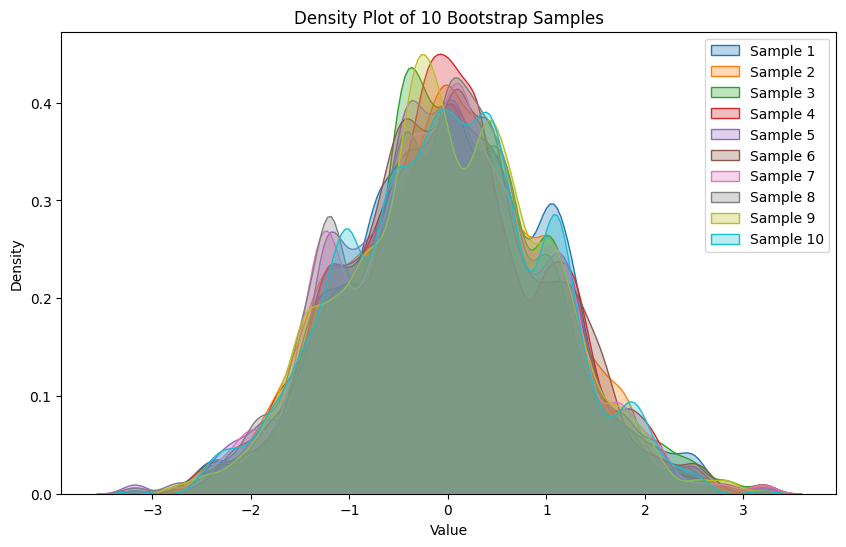

In [9]:
# Plot the distribution of the bootstrap samples
plt.figure(figsize=(10, 6))
for i, sample in enumerate(bootstrap_samples):
    sns.kdeplot(sample, bw_adjust=0.5, fill=True, alpha=0.3, label=f'Sample {i+1}')
plt.title('Density Plot of 10 Bootstrap Samples')
plt.xlabel('Value')
plt.ylabel('Density')
plt.legend()
plt.show()

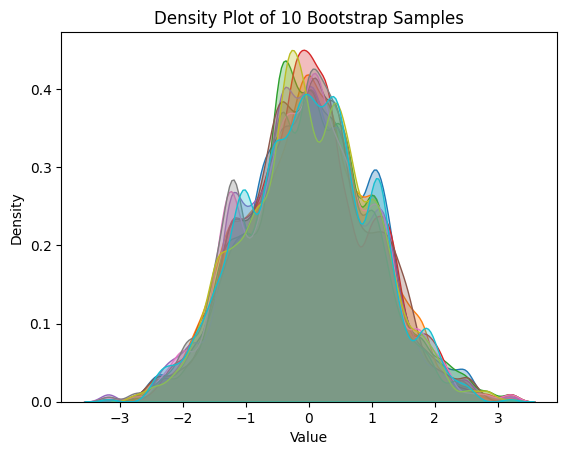

In [10]:
# b. Draw a histogram graph combining density of the 10 samples
for sample in bootstrap_samples:
    sns.kdeplot(sample, bw_adjust=0.5, fill=True, alpha=0.3)

plt.title('Density Plot of 10 Bootstrap Samples')
plt.xlabel('Value')
plt.ylabel('Density')
plt.show()

In [11]:
# c. Estimate the 95% confidence interval for the means of the samples using bootstrap
bootstrap_means = [np.mean(sample) for sample in bootstrap_samples]
ci_lower, ci_upper = np.percentile(bootstrap_means, [2.5, 97.5])

print(f"95% Confidence Interval for the means of the samples: [{ci_lower}, {ci_upper}]")

95% Confidence Interval for the means of the samples: [-0.07419643362555982, 0.04990313953908341]
